In [21]:
#The notebook includes:

###time evolution information of 231Pa and 230Th in Canada Basin, Alpha Ridge and Nansen Basin

In [22]:
from pykrige.ok import OrdinaryKriging
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os,glob,copy
from matplotlib import gridspec
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [23]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1m_00010101_00041001_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/PISCES_1y_00010101_00041001_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/r_PISCES_1m_00010101_00041001_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/r_PISCES_1y_00010101_00041001_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/rr_PISCES_1m_00010101_00011231_ptrc_T.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/rr_PISCES_1y_00010101_00011231_ptrc_T.nc']


In [36]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:]
TR_8=ptrc.variables['TR_8'][:]
TR_9=ptrc.variables['TR_9'][:]
TR_10=ptrc.variables['TR_10'][:]
depth = ptrc.variables['deptht'][:]
print TR_7.shape

(45, 31, 149, 182)


In [37]:
ptrc2=nc.Dataset(nc_filename[2])
TR_72=ptrc2.variables['TR_7'][:]/(1e6)
TR_82=ptrc2.variables['TR_8'][:]/(1e6)
TR_92=ptrc2.variables['TR_9'][:]/(1e6)
TR_102=ptrc2.variables['TR_10'][:]/(1e6)
print TR_72.shape

(45, 31, 149, 182)


In [38]:
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)
TR_8=np.ma.masked_where(TR_8<= 0, TR_8)
TR_9=np.ma.masked_where(TR_9<= 0, TR_9)
TR_10=np.ma.masked_where(TR_10<= 0, TR_10)
TR_7=np.ma.masked_where(np.isnan(TR_7),TR_7)
TR_8=np.ma.masked_where(np.isnan(TR_8),TR_8)
TR_9=np.ma.masked_where(np.isnan(TR_9),TR_9)
TR_10=np.ma.masked_where(np.isnan(TR_10),TR_10)
print np.max(TR_7)
print np.min(TR_7)

0.464571
9.43729e-08


In [39]:
TR_72=np.ma.masked_where(TR_72<= 0, TR_72)
TR_82=np.ma.masked_where(TR_82<= 0, TR_82)
TR_92=np.ma.masked_where(TR_92<= 0, TR_92)
TR_102=np.ma.masked_where(TR_102<= 0, TR_102)
TR_72=np.ma.masked_where(np.isnan(TR_72),TR_72)
TR_82=np.ma.masked_where(np.isnan(TR_82),TR_82)
TR_92=np.ma.masked_where(np.isnan(TR_92),TR_92)
TR_102=np.ma.masked_where(np.isnan(TR_102),TR_102)
print np.max(TR_72)
print np.min(TR_72)

0.452842
9.43729e-08


In [9]:
def tracer_evolution(i,k,j,x,y,name):
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(3, 3)
    ax = fig.add_subplot(gs[0:2,0])
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
    if x==133:
        c='orange';
    if x== 145:
        c='red';
    if x==141:
        c='cyan'
    m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=40)

    etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
    topoin = -etopodata.variables['ROSE'][:]
    topoin_ma=np.ma.masked_where(topoin<=0,topoin)
    lons = etopodata.variables['ETOPO05_X'][:]
    lats = etopodata.variables['ETOPO05_Y'][:]
    gridx, gridy = np.meshgrid(lons, lats)
    xs,ys = m(gridx,gridy)  
    m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
    plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

    ax = fig.add_subplot(gs[0,1])
    plt.plot(TR_7[:,i,x,y],label=('diss. Pa,layer%s'%i))
    plt.plot(TR_9[:,i,x,y],label=('part. Pa,layer%s'%i))
    plt.plot(TR_7[:,i,x,y]+TR_9[:,i,x,y],label=('total. Pa,layer%s'%i),alpha=0.8)
    plt.plot(TR_72[:,i,x,y],label=('diss. Pa,layer%s'%i),linestyle='--')
    plt.plot(TR_92[:,i,x,y],label=('part. Pa,layer%s'%i),linestyle='--')
    plt.plot(TR_72[:,i,x,y]+TR_92[:,i,x,y],linestyle='--',label=('total. Pa,layer%s'%i),alpha=0.8,color='purple')
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim)
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[0,2])      
    plt.plot(TR_8[:,i,x,y],label=('diss. Th,layer%s'%i))
    plt.plot(TR_10[:,i,x,y],label=('part. Th,layer%s'%i))
    plt.plot(TR_8[:,i,x,y]+TR_10[:,i,x,y],label=('total. Th,layer%s'%i),alpha=0.8)
    plt.plot(TR_82[:,i,x,y],label=('diss. Th,layer%s'%i),linestyle='--')
    plt.plot(TR_102[:,i,x,y],label=('part. Th,layer%s'%i),linestyle='--')
    plt.plot(TR_82[:,i,x,y]+TR_102[:,i,x,y],linestyle='--',label=('total. Th,layer%s'%i),alpha=0.8,color='purple')
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim2)
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[1,1])
    plt.plot(TR_7[:,k,x,y],label=('diss. Pa,layer%s'%k))
    plt.plot(TR_9[:,k,x,y],label=('part. Pa,layer%s'%k))
    plt.plot(TR_7[:,k,x,y]+TR_9[:,k,x,y],label=('total. Pa,layer%s'%k),alpha=0.8) 
    plt.plot(TR_72[:,k,x,y],label=('diss. Pa,layer%s'%k),linestyle='--')
    plt.plot(TR_92[:,k,x,y],label=('part. Pa,layer%s'%k),linestyle='--')
    plt.plot(TR_72[:,k,x,y]+TR_92[:,k,x,y],linestyle='--',label=('total. Pa,layer%s'%k),alpha=0.8,color='purple') 
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim)
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[1,2])
    plt.plot(TR_8[:,k,x,y],label=('diss. Th,layer%s'%k))
    plt.plot(TR_10[:,k,x,y],label=('part. Th,layer%s'%k))
    plt.plot(TR_8[:,k,x,y]+TR_10[:,k,x,y],label=('total. Th,layer%s'%k),alpha=0.8) 
    plt.plot(TR_82[:,k,x,y],label=('diss. Th,layer%s'%k),linestyle='--')
    plt.plot(TR_102[:,k,x,y],label=('part. Th,layer%s'%k),linestyle='--')
    plt.plot(TR_82[:,k,x,y]+TR_102[:,k,x,y],linestyle='--',label=('total. Th,layer%s'%k),alpha=0.8,color='purple')  
    plt.legend(loc=0,fontsize=11)
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim2)

    ax = fig.add_subplot(gs[2,1])
    plt.plot(TR_7[:,j,x,y],label=('diss. Pa,layer%s'%j))
    plt.plot(TR_9[:,j,x,y],label=('part. Pa,layer%s'%j))
    plt.plot(TR_7[:,j,x,y]+TR_9[:,j,x,y],label=('total. Pa,layer%s'%j),alpha=0.8)
    plt.plot(TR_72[:,j,x,y],label=('diss. Pa,layer%s'%j),linestyle='--')
    plt.plot(TR_92[:,j,x,y],label=('part. Pa,layer%s'%j),linestyle='--')
    plt.plot(TR_72[:,j,x,y]+TR_92[:,j,x,y],linestyle='--',label=('total. Pa,layer%s'%j),alpha=0.8,color='purple')
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim)
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(gs[2,2])
    plt.plot(TR_8[:,j,x,y],label=('diss. Th,layer%s'%j))
    plt.plot(TR_10[:,j,x,y],label=('part. Th,layer%s'%j))
    plt.plot(TR_8[:,j,x,y]+TR_10[:,j,x,y],label=('total. Th,layer%s'%j),alpha=0.8)
    plt.plot(TR_82[:,j,x,y],label=('diss. Th,layer%s'%j),linestyle='--')
    plt.plot(TR_102[:,j,x,y],label=('part. Th,layer%s'%j),linestyle='--')
    plt.plot(TR_82[:,j,x,y]+TR_102[:,j,x,y],linestyle='--',label=('total. Th,layer%s'%j),alpha=0.8,color='purple')
    plt.legend(loc=0,fontsize=11)
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    #plt.ylim(ylim2)
    plt.show()

#Canada Basin 

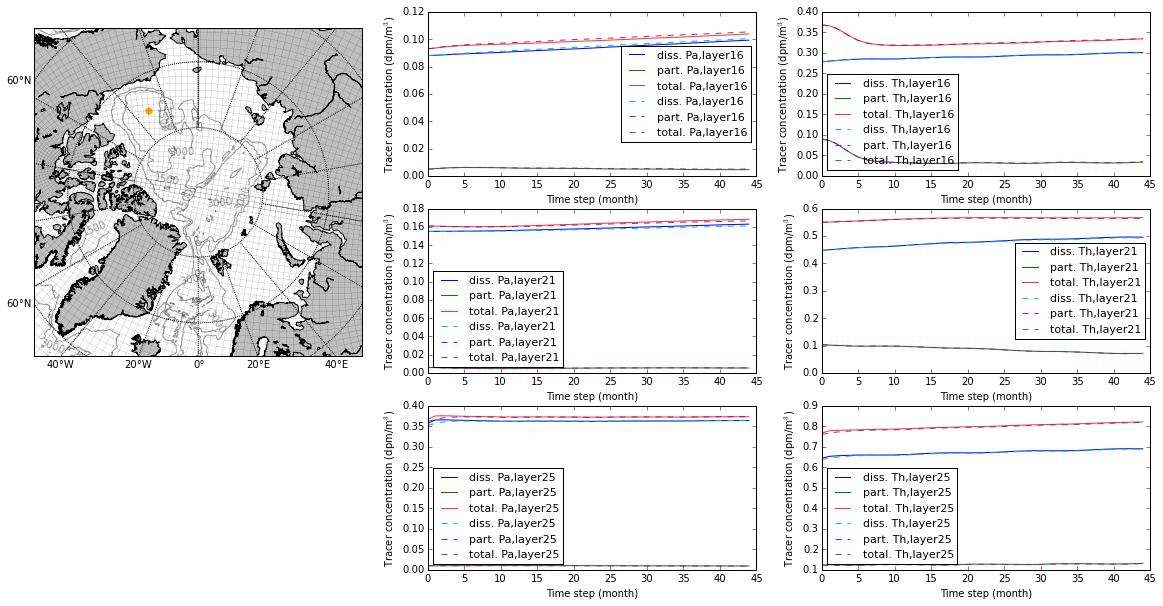

In [147]:
j=25;i=16;k=21
tracer_evolution(i,k,j,133,60,'Canadian Basin')

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#Nansen Basin

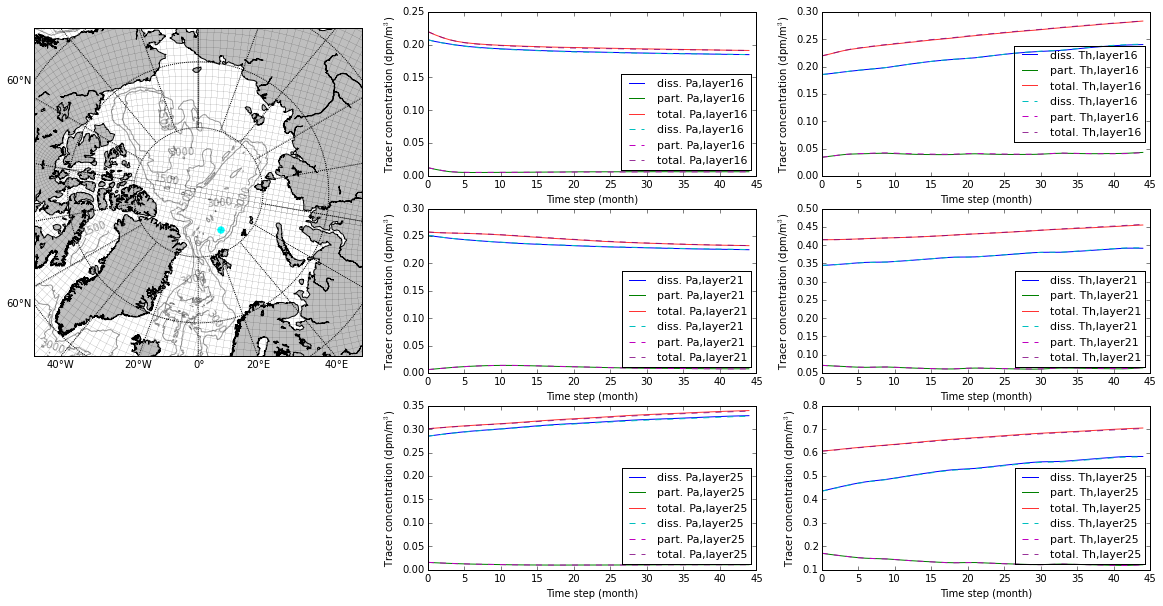

In [146]:
j=25;i=16;k=21
tracer_evolution(i,k,j,141,138,'Nansen Basin')

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#Alpha Ridge

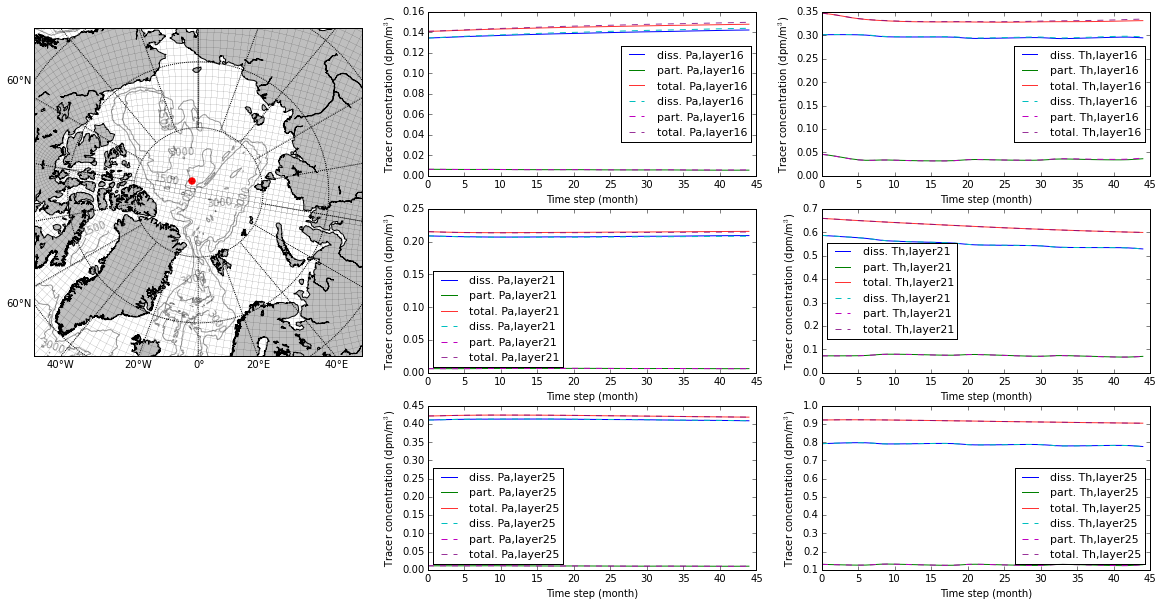

In [148]:
j=25;i=16;k=21
tracer_evolution(i,k,j,145,51,'Alpha Ridge')

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#test the trend in three basins

In [40]:
ice=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/dyna_grid_T.nc','r')
icecov=ice.variables['soicecov']
icedata1=icecov[:,133,60]
icedata2=icecov[:,145,51]
icedata3=icecov[:,141,138]

In [41]:
s1_pa=(6.01*100*icedata1+500)
s2_pa=(6.01*100*icedata2+500)
s3_pa=(6.01*100*icedata3+500)
k1_pa=(-0.0005*100*icedata1+0.06)
k2_pa=(-0.0005*100*icedata2+0.06)
k3_pa=(-0.0005*100*icedata3+0.06)
j_pa=0.31

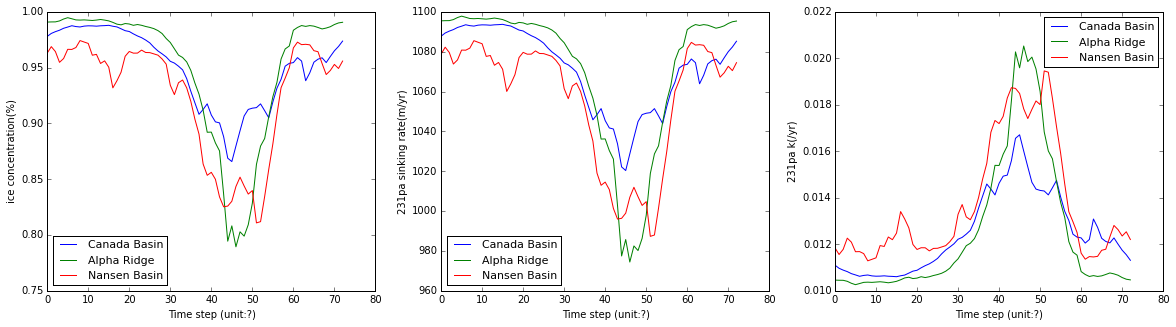

In [42]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,3,1)
plt.plot(icecov[:,133,60],label=('Canada Basin'))
plt.plot(icecov[:,145,51],label=('Alpha Ridge'))
plt.plot(icecov[:,141,138],label=('Nansen Basin'))
plt.xlabel('Time step (unit:?)')
plt.ylabel('ice concentration(%)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(1,3,2)
plt.plot(s1_pa,label=('Canada Basin'))
plt.plot(s2_pa,label=('Alpha Ridge'))
plt.plot(s3_pa,label=('Nansen Basin'))
plt.xlabel('Time step (unit:?)')
plt.ylabel('231pa sinking rate(m/yr)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(1,3,3)
plt.plot(k1_pa,label=('Canada Basin'))
plt.plot(k2_pa,label=('Alpha Ridge'))
plt.plot(k3_pa,label=('Nansen Basin'))
plt.xlabel('Time step (unit:?)')
plt.ylabel('231pa k(/yr)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)
plt.show()

In [43]:
def tracer_range(i,k,j,x,y,name):#TR_7[:,j(layer),133,60]
    Q=0.00246
    pa_d_min=np.empty([3,len(TR_7[:,0,0,0])])
    pa_d_max=np.empty([3,len(TR_7[:,0,0,0])])
    pa_p_min=np.empty([3,len(TR_7[:,0,0,0])])
    pa_p_max=np.empty([3,len(TR_7[:,0,0,0])])
    b=[i,k,j]
    for a in range(3):
        c=b[a]
        pa_p_min[a,:]=Q/np.max(s1_pa[icedata1.argmin()])*depth[c]
        pa_p_max[a,:]=Q/np.min(s1_pa[icedata1.argmax()])*depth[c]
        pa_d_min[a,:]=Q/k1_pa[icedata1.argmin()]+j_pa/k1_pa[icedata1.argmin()]*Q/s1_pa[icedata1.argmin()]*depth[c]
        pa_d_max[a,:]=Q/k1_pa[icedata1.argmax()]+j_pa/k1_pa[icedata1.argmax()]*Q/s1_pa[icedata1.argmax()]*depth[c]
    
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(1,2,2)
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[0],pa_p_max[0], facecolor='blue', alpha=0.15)
    plt.plot(TR_9[:,i,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[i])),color='blue')
    plt.plot(TR_92[:,i,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[i])),color='blue',linestyle='--')
    
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[1],pa_p_max[1], facecolor='green', alpha=0.15)
    plt.plot(TR_9[:,k,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[k])),color='green')
    plt.plot(TR_92[:,k,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[k])),color='green',linestyle='--')

    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[2],pa_p_max[2], facecolor='red', alpha=0.15)
    plt.plot(TR_9[:,j,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[j])),color='red')
    plt.plot(TR_92[:,j,x,y],label=('%s:part. Pa,depth:%s(m)'%(name,depth[j])),color='red',linestyle='--')
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(1,2,1)
    plt.plot(TR_7[:,i,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[i])),color='blue')
    plt.plot(TR_72[:,i,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[i])),color='blue',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[0],pa_d_max[0], facecolor='blue', alpha=0.15)
    
    plt.plot(TR_7[:,k,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[k])),color='green')
    plt.plot(TR_72[:,k,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[k])),color='green',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[1],pa_d_max[1], facecolor='green', alpha=0.15)
    
    plt.plot(TR_7[:,j,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[j])),color='red')
    plt.plot(TR_72[:,j,x,y],label=('%s:diss. Pa,depth:%s(m)'%(name,depth[j])),color='red',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[2],pa_d_max[2], facecolor='red', alpha=0.15)
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

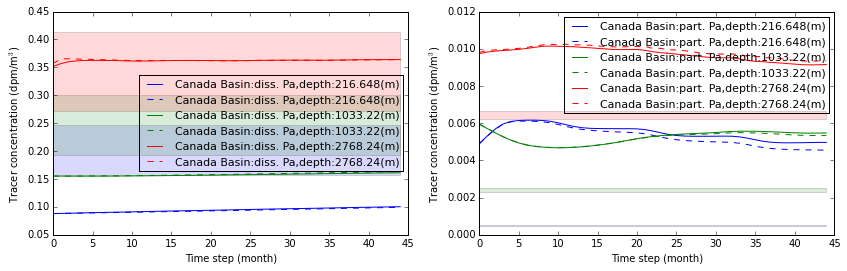

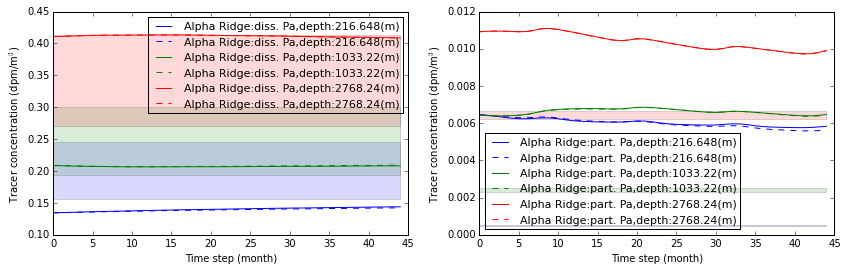

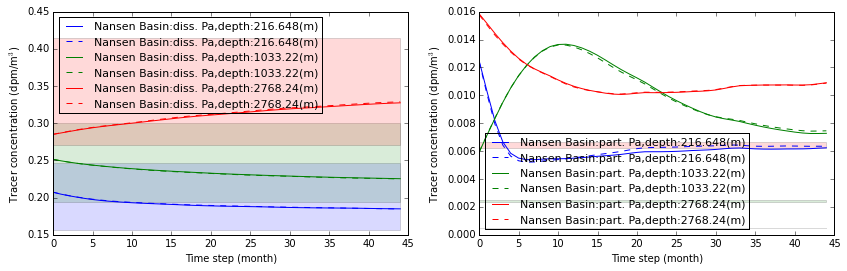

In [44]:
i=16;k=21;j=25;
tracer_range(i,k,j,133,60,'Canada Basin')
tracer_range(i,k,j,145,51,'Alpha Ridge')
tracer_range(i,k,j,141,138,'Nansen Basin')

In [45]:
s1_pa=(2.26*100*icedata1+500)
s2_pa=(2.26*100*icedata2+500)
s3_pa=(2.26*100*icedata3+500)
k1_pa=(-0.0067*100*icedata1+0.06)
k2_pa=(-0.0067*100*icedata2+0.06)
k3_pa=(-0.0067*100*icedata3+0.06)
j=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_desorption_rate.nc','r')
j_pa=j.variables['desorption_rate']

In [46]:
def tracer_range(i,k,j,x,y,name):#TR_7[:,j(layer),133,60]
    Q=0.0267
    pa_d_min=np.empty([3,len(TR_7[:,0,0,0])])
    pa_d_max=np.empty([3,len(TR_7[:,0,0,0])])
    pa_p_min=np.empty([3,len(TR_7[:,0,0,0])])
    pa_p_max=np.empty([3,len(TR_7[:,0,0,0])])
    b=[i,k,j]
    for a in range(3):
        c=b[a]
        pa_p_min[a,:]=Q/np.max(s1_pa[icedata1.argmin()])*depth[c]
        pa_p_max[a,:]=Q/np.min(s1_pa[icedata1.argmax()])*depth[c]
        pa_d_min[a,:]=Q/k1_pa[icedata1.argmin()]+j_pa[0,x,y]/k1_pa[icedata1.argmin()]*Q/s1_pa[icedata1.argmin()]*depth[c]
        pa_d_max[a,:]=Q/k1_pa[icedata1.argmax()]+j_pa[0,x,y]/k1_pa[icedata1.argmax()]*Q/s1_pa[icedata1.argmax()]*depth[c]
    
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(1,2,2)
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[0],pa_p_max[0], facecolor='blue', alpha=0.15)
    plt.plot(TR_10[:,i,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[i])),color='blue')
    plt.plot(TR_102[:,i,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[i])),color='blue',linestyle='--')
    
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[1],pa_p_max[1], facecolor='green', alpha=0.15)
    plt.plot(TR_10[:,k,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[k])),color='green')
    plt.plot(TR_102[:,k,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[k])),color='green',linestyle='--')

    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_p_min[2],pa_p_max[2], facecolor='red', alpha=0.15)
    plt.plot(TR_10[:,j,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[j])),color='red')
    plt.plot(TR_102[:,j,x,y],label=('%s:part. Th,depth:%s(m)'%(name,depth[j])),color='red',linestyle='--')
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

    ax = fig.add_subplot(1,2,1)
    plt.plot(TR_8[:,i,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[i])),color='blue')
    plt.plot(TR_82[:,i,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[i])),color='blue',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[0],pa_d_max[0], facecolor='blue', alpha=0.15)
    
    plt.plot(TR_8[:,k,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[k])),color='green')
    plt.plot(TR_82[:,k,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[k])),color='green',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[1],pa_d_max[1], facecolor='green', alpha=0.15)
    
    plt.plot(TR_8[:,j,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[j])),color='red')
    plt.plot(TR_82[:,j,x,y],label=('%s:diss. Th,depth:%s(m)'%(name,depth[j])),color='red',linestyle='--')
    plt.fill_between(range(len(TR_7[:,0,0,0])),pa_d_min[2],pa_d_max[2], facecolor='red', alpha=0.15)
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.legend(loc=0,fontsize=11)

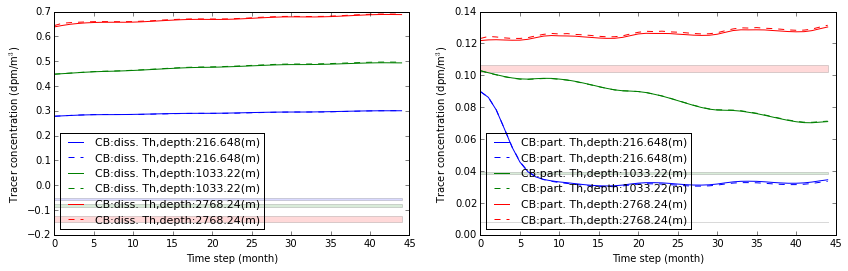

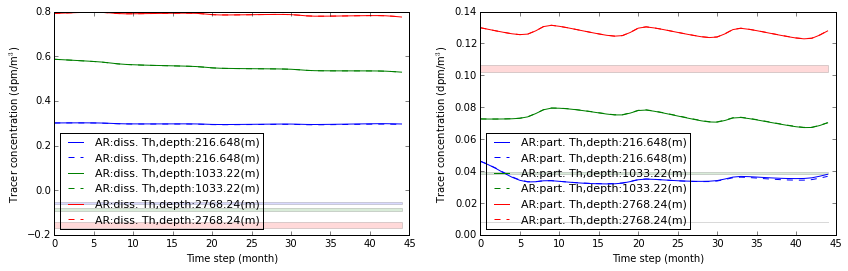

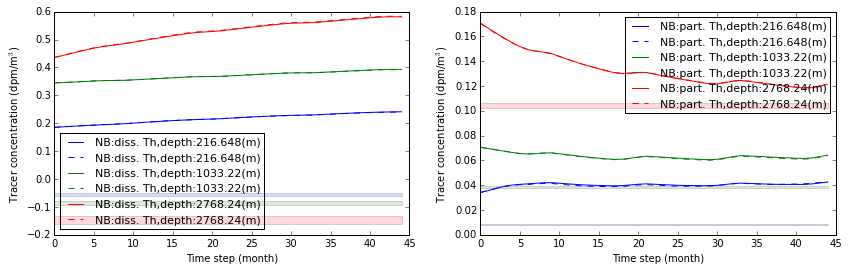

In [47]:
i=16;k=21;j=25;
tracer_range(i,k,j,133,60,'CB')
tracer_range(i,k,j,145,51,'AR')
tracer_range(i,k,j,141,138,'NB')

#spatio-temporal changes in $^{231}$Pa/$^{230}$Th

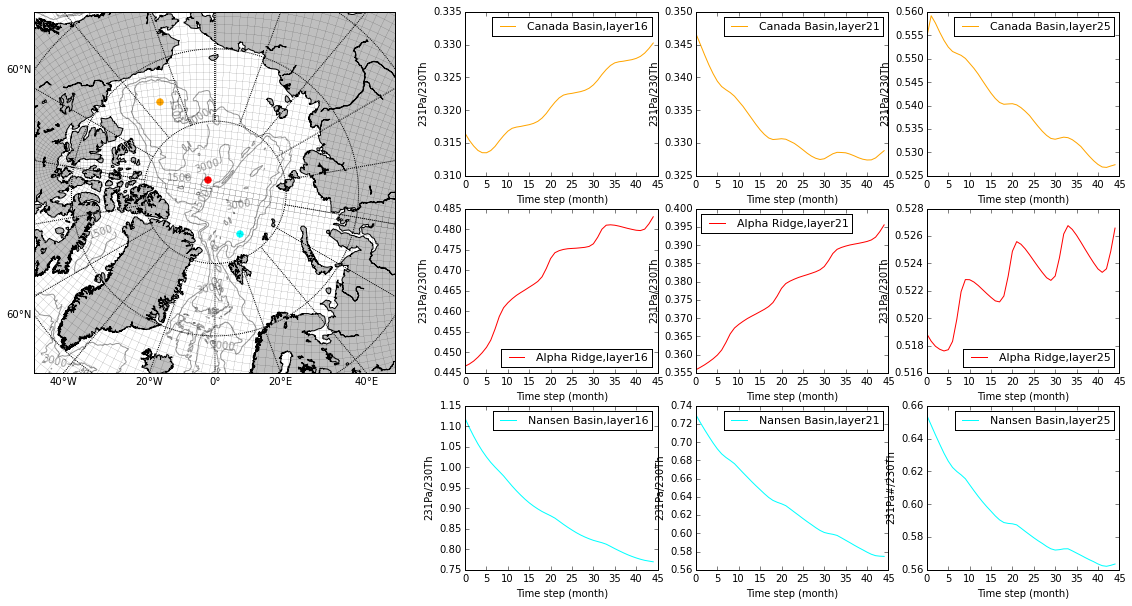

In [17]:
j=25;i=16;k=21
#ylim=[0,0.35];ylim2=[0,0.8]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 5)
ax = fig.add_subplot(gs[0:2,0:2])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
m.scatter(x_lon[133,60],y_lat[133,60],color='orange',s=40)
m.scatter(x_lon[145,51],y_lat[145,51],color='red',s=40)
m.scatter(x_lon[141,138],y_lat[141,138],color='cyan',s=40)

etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  
m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')


ax = fig.add_subplot(gs[0,2])
plt.plot(TR_7[:,i,133,60]/TR_8[:,i,133,60],label=('Canada Basin,layer%s'%i),color='orange')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,3])
plt.plot(TR_7[:,k,133,60]/TR_8[:,k,133,60],label=('Canada Basin,layer%s'%k),color='orange')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,4])     
plt.plot(TR_7[:,j,133,60]/TR_8[:,j,133,60],label=('Canada Basin,layer%s'%j),color='orange')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_7[:,i,145,51]/TR_8[:,i,145,51],label=('Alpha Ridge,layer%s'%i),color='red')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,3])
plt.plot(TR_7[:,k,145,51]/TR_8[:,k,145,51],label=('Alpha Ridge,layer%s'%k),color='red')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,4])
plt.plot(TR_7[:,j,145,51]/TR_8[:,j,145,51],label=('Alpha Ridge,layer%s'%j),color='red')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_7[:,i,141,138]/TR_8[:,i,141,138],label=('Nansen Basin,layer%s'%i),color='cyan')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,3])
plt.plot(TR_7[:,k,141,138]/TR_8[:,k,141,138],label=('Nansen Basin,layer%s'%k),color='cyan')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,4])
plt.plot(TR_7[:,j,141,138]/TR_8[:,j,141,138],label=('Nansen Basin,layer%s'%j),color='cyan')
plt.xlabel('Time step (month)')
plt.ylabel('231Pa#/230Th')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

plt.show()

ps. Layer 16=181.96m(Pacific Layer)
Layer 21=732.20m(Atlantic Layer)
Layer 25=2289.77m(Arctic bottom water)

#how does 21Pa/230Th change with depth 

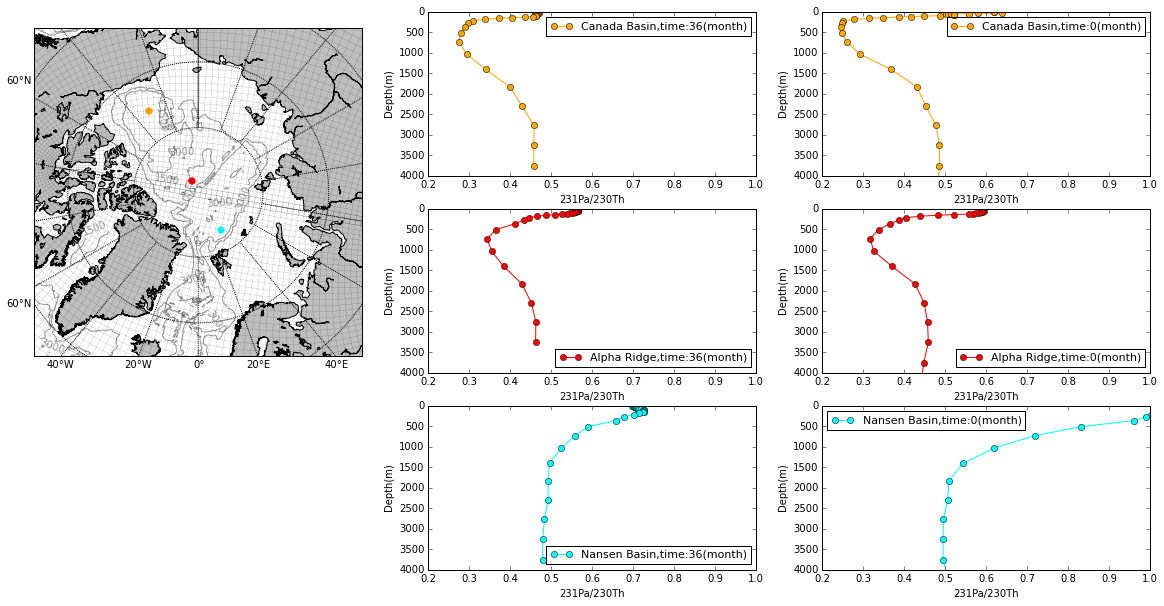

In [36]:
t=36
t2=0
ylim=[0,4000];xlim=[0.2,1.0]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon,y_lat,x_lon.T,y_lat.T,color='k',linewidth=0.1)
m.scatter(x_lon[133,60],y_lat[133,60],color='orange',s=40)
m.scatter(x_lon[145,51],y_lat[145,51],color='red',s=40)
m.scatter(x_lon[141,138],y_lat[141,138],color='cyan',s=40)

etopodata = nc.Dataset('http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc')
topoin = -etopodata.variables['ROSE'][:]
topoin_ma=np.ma.masked_where(topoin<=0,topoin)
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
gridx, gridy = np.meshgrid(lons, lats)
xs,ys = m(gridx,gridy)  
m = m.contour(xs,ys,topoin_ma,linewidth=0.075,colors='black',alpha=0.4)
plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')


ax = fig.add_subplot(gs[0,1])
plt.plot((TR_7[t,:,133,60]+TR_9[t,:,133,60])/(TR_8[t,:,133,60]+TR_10[t,:,133,60]),depth,marker='o',label=('Canada Basin,time:%s(month)'%t),color='orange')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[0,2])
plt.plot((TR_7[t2,:,133,60]+TR_9[t2,:,133,60])/(TR_8[t2,:,133,60]+TR_10[t2,:,133,60]),depth,marker='o',label=('Canada Basin,time:%s(month)'%t2),color='orange')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,1])
plt.plot((TR_7[t,:,145,51]+TR_9[t,:,145,51])/(TR_8[t,:,145,51]+TR_10[t,:,145,51]),depth,marker='o',label=('Alpha Ridge,time:%s(month)'%t),color='red')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[1,2])
plt.plot((TR_7[t2,:,145,51]+TR_9[t2,:,145,51])/(TR_8[t2,:,145,51]+TR_10[t2,:,145,51]),depth,marker='o',label=('Alpha Ridge,time:%s(month)'%t2),color='red')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()


ax = fig.add_subplot(gs[2,1])
plt.plot((TR_7[t,:,141,138]+TR_9[t,:,141,138])/(TR_8[t,:,141,138]+TR_10[t,:,141,138]),depth,marker='o',label=('Nansen Basin,time:%s(month)'%t),color='cyan')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()

ax = fig.add_subplot(gs[2,2])
plt.plot((TR_7[t2,:,141,138]+TR_9[t2,:,141,138])/(TR_8[t2,:,141,138]+TR_10[t2,:,141,138]),depth,marker='o',label=('Nansen Basin,time:%s(month)'%t2),color='cyan')
plt.ylabel('Depth(m)')
plt.xlabel('231Pa/230Th')
plt.ylim(ylim)
plt.xlim(xlim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis()

plt.show()